## KAGGLE COMPETITION

Columns:

- **ID**: int64
- **order_status**: object
- **order_products_value**: float64
- **order_freight_value**: float64
- **order_items_qty**: float64
- **order_sellers_qty**: float64
- **order_purchase_timestamp**: object
- **order_aproved_at**: object
- **order_estimated_delivery_date**: object
- **order_delivered_customer_date**: object
- **customer_city**: object
- **customer_state**: object
- **customer_zip_code_prefix**: float64
- **product_category_name_english**: object
- **product_name_lenght**: float64
- **product_description_lenght**: float64
- **product_photos_qty**: float64
- **target**: int64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.dummy import DummyRegressor
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import mean_absolute_error
from skopt.space import Integer
from skopt import BayesSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.feature_selection import f_regression, mutual_info_regression
from category_encoders import TargetEncoder




In [2]:
#data = pd.read_csv("C:\\Users\\victoria\\Escritorio\\MASTER\\Big Data Intelligence\\Assignment_1\\Big_Data_Intelligence\\datailable.csv.gzip", compression="gzip")

In [3]:
#pongo aqui abajo mi path 

data = pd.read_csv("C:\\Users\\victoria\\Escritorio\\MASTER\\Machine Learning\\Kaggle Competition\\train_set.csv")

## 1. Exploratory Data Analysis


### 1.1. Number of features

Los datos tienen 18 columnas x 55200 filas.

In [4]:
pd.set_option('display.max_rows', 10)
data



,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,target
0,0,delivered,39.90,15.38,1.0,1.0,2018-08-08 13:03:52.000000,2018-08-08 13:15:22.255565,2018-08-15 00:00:00.000000,2018-08-13 22:11:44.366805,Sao Paulo,SP,44.0,consoles_games,59.0,434.0,3.0,5
1,1,delivered,279.99,31.82,NaN,1.0,2018-04-30 20:24:33.000000,2018-05-01 03:15:02.640177,2018-05-15 00:00:00.000000,2018-05-09 19:50:37.813505,Sao Paulo,SP,51.0,housewares,35.0,1800.0,1.0,3
2,2,delivered,144.90,16.77,1.0,1.0,2017-08-01 09:49:05.000000,2017-08-02 02:55:58.162450,2017-08-23 00:00:00.000000,2017-08-11 19:04:16.644822,NaN,PR,842.0,health_beauty,63.0,580.0,5.0,5
3,3,delivered,170.00,16.82,1.0,1.0,2017-11-29 11:47:31.000000,2017-11-29 11:57:31.647096,2017-12-20 00:00:00.000000,2017-12-08 16:31:45.044090,Santa Gertrudes,SP,135.0,watches_gifts,35.0,514.0,2.0,5
4,4,delivered,40.90,14.10,1.0,1.0,2017-10-23 14:32:55.000000,2017-10-23 14:49:10.354927,2017-11-09 00:00:00.000000,2017-11-07 21:12:19.296363,Sao Paulo,SP,40.0,health_beauty,31.0,2392.0,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,55195,delivered,49.00,13.71,1.0,1.0,2018-04-27 16:17:04.000000,2018-04-27 17:11:52.642510,2018-05-18 00:00:00.000000,2018-05-08 13:51:57.886946,Sao Paulo,SP,48.0,toys,54.0,77.0,2.0,5
55196,55196,delivered,62.80,34.24,NaN,1.0,2017-11-02 22:41:18.000000,2017-11-03 00:35:49.562322,2017-12-01 00:00:00.000000,2017-11-24 21:16:58.154968,Campina Grande,PB,584.0,market_place,55.0,1626.0,1.0,5
55197,55197,delivered,24.90,7.43,1.0,1.0,2018-07-23 18:33:22.000000,NaN,2018-08-01 00:00:00.000000,2018-07-25 21:16:34.511924,Aruja,SP,74.0,bed_bath_table,57.0,74.0,1.0,5
55198,55198,delivered,39.99,12.79,1.0,1.0,2018-04-21 11:47:23.000000,2018-04-24 19:20:57.531537,2018-05-16 00:00:00.000000,2018-04-30 15:06:52.305277,Presidente Prudente,SP,190.0,health_beauty,NaN,216.0,1.0,1


En cuanto al resto de columnas iremos viendo poco a poco si son útiles o como usarlas mejor, pero por ahora podemos quitar el ID.

In [5]:
data= data.drop(columns=['ID'])


### 1.2. Variable type

Observamos los tipos de variables de cada colunma. Tenemos tanto numericas tipo float (solo la target es int), como categoricas tipo object. CUIDADO tenemos columnas de fecha que están tipo object, las cambiamos a datetime para tratar mejor con ellas más adelante.

In [6]:
pd.set_option('display.max_rows', None)
data.dtypes

order_status                      object
order_products_value             float64
order_freight_value              float64
order_items_qty                  float64
order_sellers_qty                float64
order_purchase_timestamp          object
order_aproved_at                  object
order_estimated_delivery_date     object
order_delivered_customer_date     object
customer_city                     object
customer_state                    object
customer_zip_code_prefix         float64
product_category_name_english     object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
target                             int64
dtype: object

In [7]:


# Assuming `data` is your DataFrame
# Replace `data` with the name of your DataFrame
date_columns = ['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date']

# Convert specified columns to datetime type
data[date_columns] = data[date_columns].apply(pd.to_datetime)

# Verify the data types after conversion
data.dtypes

order_status                             object
order_products_value                    float64
order_freight_value                     float64
order_items_qty                         float64
order_sellers_qty                       float64
order_purchase_timestamp         datetime64[ns]
order_aproved_at                 datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
customer_city                            object
customer_state                           object
customer_zip_code_prefix                float64
product_category_name_english            object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
target                                    int64
dtype: object

### 1.3. Missing values

Comrpobamos el porcentaje de nulos y número para asegurarnos de que no hay ninguna columa muy vacía. En este caso todas las columnas tienen nulos pero en bajo porcentaje, así que trataremos esto más adelante con métodos de imputación.



In [8]:
null_percentage = data.isnull().sum()/ len(data) * 100
print(null_percentage[null_percentage > 80])
print(max(null_percentage))
null_percentage

Series([], dtype: float64)
7.249999999999999


order_status                     4.925725
order_products_value             4.891304
order_freight_value              4.876812
order_items_qty                  5.007246
order_sellers_qty                4.742754
order_purchase_timestamp         4.771739
order_aproved_at                 4.927536
order_estimated_delivery_date    4.911232
order_delivered_customer_date    7.250000
customer_city                    4.791667
customer_state                   4.797101
customer_zip_code_prefix         5.000000
product_category_name_english    4.708333
product_name_lenght              4.876812
product_description_lenght       4.903986
product_photos_qty               4.932971
target                           0.000000
dtype: float64

In [9]:
data.isnull().sum()

order_status                     2719
order_products_value             2700
order_freight_value              2692
order_items_qty                  2764
order_sellers_qty                2618
order_purchase_timestamp         2634
order_aproved_at                 2720
order_estimated_delivery_date    2711
order_delivered_customer_date    4002
customer_city                    2645
customer_state                   2648
customer_zip_code_prefix         2760
product_category_name_english    2599
product_name_lenght              2692
product_description_lenght       2707
product_photos_qty               2723
target                              0
dtype: int64

### 1.4. Statistics



Esto simplemente es para conocer un poco la distribución de las variables numéricas y fechas. Por ejemplo la media de precio de los productos es 129, mientras que de media se piden 1.1 productos en cada pedido (no se si order_items_qty significa esto). Pero vamos que en general esto no sirve pa mucho.

In [10]:
data.describe().T


,count,mean,min,25%,50%,75%,max,std
order_products_value,52500.0,129.704295,2.0,47.0,82.99,145.9,13440.0,202.864564
order_freight_value,52508.0,21.829754,0.0,13.51,16.79,23.04,687.96,19.728287
order_items_qty,52436.0,1.099645,1.0,1.0,1.0,1.0,20.0,0.462256
order_sellers_qty,52582.0,1.13942,1.0,1.0,1.0,1.0,30.0,0.67629
order_purchase_timestamp,52566,2017-11-21 04:06:32.011528192,2016-09-04 21:15:19,2017-07-22 19:15:44.750000128,2017-11-24 16:16:59.500000,2018-03-20 19:52:49.750000128,2018-09-28 00:17:39,NaN
order_aproved_at,52480,2017-11-21 19:46:11.694213376,2016-10-04 09:43:32.358944,2017-07-23 16:14:02.292651008,2017-11-24 23:34:04.913637888,2018-03-21 15:31:44.840334592,2018-09-28 03:50:08.984937,NaN
order_estimated_delivery_date,52489,2017-12-15 13:50:37.733620224,2016-10-10 00:00:00,2017-08-15 00:00:00,2017-12-18 00:00:00,2018-04-12 00:00:00,2018-11-29 00:00:00,NaN
order_delivered_customer_date,51198,2017-12-05 08:10:12.894834944,2016-10-11 13:46:32.082168,2017-08-03 22:19:18.854200832,2017-12-08 01:18:34.782458112,2018-04-08 12:42:53.648237824,2018-10-02 20:22:45.466581,NaN
customer_zip_code_prefix,52440.0,354.425248,10.0,116.0,255.0,590.0,999.0,297.27013
product_name_lenght,52508.0,48.835606,5.0,42.0,52.0,57.0,72.0,10.157874


### 1.5. Constant columns

Similarly with the null values, if any column has constant values, this gives no information to the final model, so it should be removed. Taking into account that some variables have null values, we should look if the number of unique values is less or equal to 2 (the constant value and Nan). As is not the case, we don't have any column with constant values.
Pues eso, que no hay variables constantes. 


In [11]:
print(data.nunique() <= 2)
#data.nunique()

order_status                     False
order_products_value             False
order_freight_value              False
order_items_qty                  False
order_sellers_qty                False
order_purchase_timestamp         False
order_aproved_at                 False
order_estimated_delivery_date    False
order_delivered_customer_date    False
customer_city                    False
customer_state                   False
customer_zip_code_prefix         False
product_category_name_english    False
product_name_lenght              False
product_description_lenght       False
product_photos_qty               False
target                           False
dtype: bool


### 1.7. Repeated rows

Chequeamos si hay filas repetidas y las quitamos. Si que hay bastantes.

In [12]:
# Assuming `data` is your DataFrame
# Replace `data` with the name of your DataFrame

# Check for duplicated rows
duplicated_rows = data[data.duplicated()]

# Print duplicated rows
if not duplicated_rows.empty:
    print("Duplicated rows found:")
    print(duplicated_rows)
else:
    print("No duplicated rows found.")


Duplicated rows found:
      order_status  order_products_value  order_freight_value  \
11567    delivered                234.00                18.35   
20354    delivered                149.99                15.66   
23779    delivered                 23.99                17.63   
24823    delivered                160.55                31.87   
26330    delivered                 26.40                 8.72   
26488    delivered                 89.90                 9.44   
26853    delivered                 44.99                18.23   
29384    delivered                249.89                23.48   
30703    delivered                 56.99                14.15   
32581    delivered                 39.00                15.79   
32929    delivered                 24.90                10.96   
33442    delivered                 16.10                17.63   
33857    delivered                 48.90                14.08   
34422    delivered                 79.00                30.86   
35

In [13]:
# Drop duplicate rows
pd.set_option('display.max_rows', 10)

data_no_duplicates = data.drop_duplicates()

# Print if duplicates were dropped or not
if len(data) != len(data_no_duplicates):
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

# Optionally, you can print the DataFrame without duplicates:
data_no_duplicates


Duplicate rows removed.


,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,target
0,delivered,39.90,15.38,1.0,1.0,2018-08-08 13:03:52,2018-08-08 13:15:22.255565,2018-08-15,2018-08-13 22:11:44.366805,Sao Paulo,SP,44.0,consoles_games,59.0,434.0,3.0,5
1,delivered,279.99,31.82,NaN,1.0,2018-04-30 20:24:33,2018-05-01 03:15:02.640177,2018-05-15,2018-05-09 19:50:37.813505,Sao Paulo,SP,51.0,housewares,35.0,1800.0,1.0,3
2,delivered,144.90,16.77,1.0,1.0,2017-08-01 09:49:05,2017-08-02 02:55:58.162450,2017-08-23,2017-08-11 19:04:16.644822,NaN,PR,842.0,health_beauty,63.0,580.0,5.0,5
3,delivered,170.00,16.82,1.0,1.0,2017-11-29 11:47:31,2017-11-29 11:57:31.647096,2017-12-20,2017-12-08 16:31:45.044090,Santa Gertrudes,SP,135.0,watches_gifts,35.0,514.0,2.0,5
4,delivered,40.90,14.10,1.0,1.0,2017-10-23 14:32:55,2017-10-23 14:49:10.354927,2017-11-09,2017-11-07 21:12:19.296363,Sao Paulo,SP,40.0,health_beauty,31.0,2392.0,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,delivered,49.00,13.71,1.0,1.0,2018-04-27 16:17:04,2018-04-27 17:11:52.642510,2018-05-18,2018-05-08 13:51:57.886946,Sao Paulo,SP,48.0,toys,54.0,77.0,2.0,5
55196,delivered,62.80,34.24,NaN,1.0,2017-11-02 22:41:18,2017-11-03 00:35:49.562322,2017-12-01,2017-11-24 21:16:58.154968,Campina Grande,PB,584.0,market_place,55.0,1626.0,1.0,5
55197,delivered,24.90,7.43,1.0,1.0,2018-07-23 18:33:22,NaT,2018-08-01,2018-07-25 21:16:34.511924,Aruja,SP,74.0,bed_bath_table,57.0,74.0,1.0,5
55198,delivered,39.99,12.79,1.0,1.0,2018-04-21 11:47:23,2018-04-24 19:20:57.531537,2018-05-16,2018-04-30 15:06:52.305277,Presidente Prudente,SP,190.0,health_beauty,NaN,216.0,1.0,1


In [14]:
data= data_no_duplicates

### 1.8. Visualization

Una vez que hemmos hecho una primera limpieza (duplicados, columnas constances etc) sencilla, visualizamos algunas de las variables para entender mejor a qué nos enfrentamos. La primera que hay que visualizar sería el target. Claramente vemos un problema de Umbalanced Data, como realmente el problema es de regression y no classificación no habría problema a la hora de desarrollar el modelo, pero es importante tener en cuenta esto a la hora de dividir en train-validation train-train, para que los resultados del validation sean lo más similares a los que encontraremos en el test (aunque si es cierto que no conocemos la distribución del test)

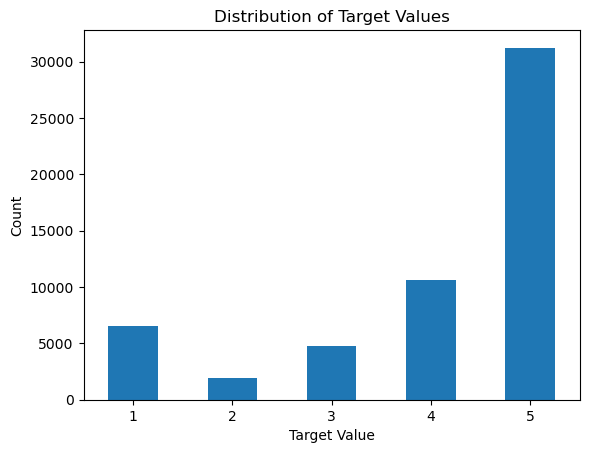

In [15]:
pd.set_option('display.max_rows', 10)
data['target'].value_counts().sort_index().plot(kind='bar')

plt.title('Distribution of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Para continuar con la visualización, nos centramos en las columnas categóricas. Sin embargo, antes de hacer plots a lo loco vamos a ver cuantos valores únicos tiene cada columna para ver si es viable visualizarlos en un bar plot. Como vemos, las columnas de fechas son inviables (para usarlas útilmente más adelante haremos feature engineering para sacar la información necesaria de estas fechas).  Y también las de ciudad son inviables.



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# Replace `data` with the name of your DataFrame
object_columns = data.select_dtypes(include=['object', 'datetime64[ns]']).columns

for column in object_columns:
    num_categories = data[column].nunique()
    print(f"Number of categories in column '{column}': {num_categories}")



Number of categories in column 'order_status': 6
Number of categories in column 'order_purchase_timestamp': 51264
Number of categories in column 'order_aproved_at': 51406
Number of categories in column 'order_estimated_delivery_date': 466
Number of categories in column 'order_delivered_customer_date': 50140
Number of categories in column 'customer_city': 3388
Number of categories in column 'customer_state': 27
Number of categories in column 'product_category_name_english': 70


Observando order_status vemos que también hay un imbalanceamiento importante ya que la mayoría de pedidos están en 'delivered'. Sin embargo, para el objetivo de este trabajo es incluso más importante las demás categorías ya que, pese a ser minoritarias, seguro que en los pedidos donde ha habido problemas es donde menor 'target' (asumiendo que el target es el numero de estrellas del pedido que da el cliente) hay. 

Luego customer_state no da mucha información. Y con product_category_name_english vemos que la mayoría de pedidos son de healthy_beauty, furniture_decor etc pero tampoco nos da mucha más info, solo que hay muchas categorías con demasiado pocos pedidos, por lo que incluirlas en el modelo podría empeorar su poder de predicción. Trataremos esto más adelante también. 

C:\Users\victoria\AppData\Local\Temp\ipykernel_12688\2289560511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


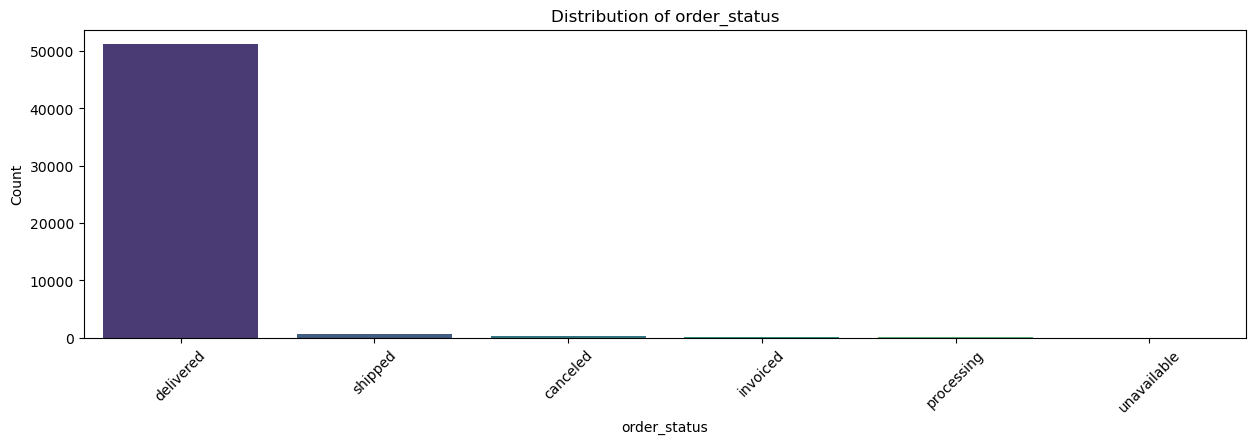

C:\Users\victoria\AppData\Local\Temp\ipykernel_12688\2289560511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


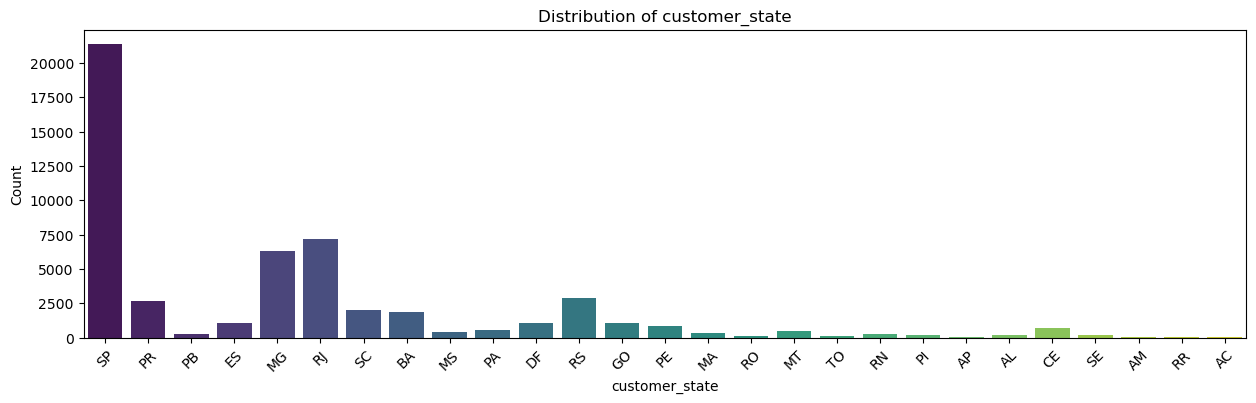

C:\Users\victoria\AppData\Local\Temp\ipykernel_12688\2289560511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


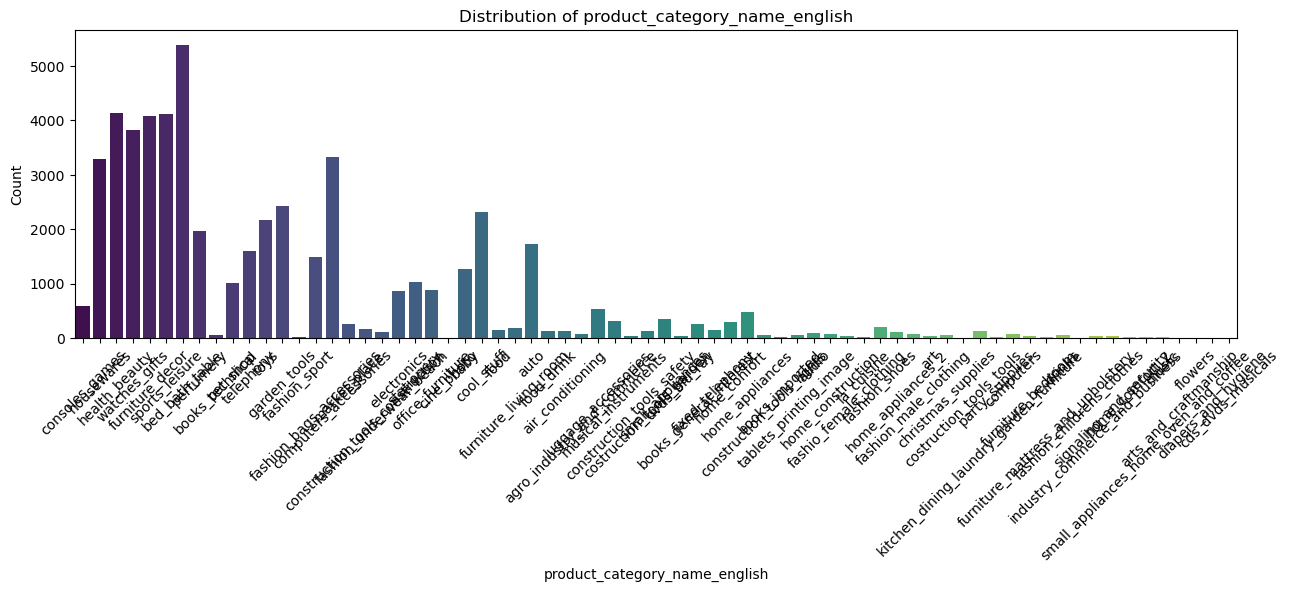

In [17]:
# Iterate over each object column and create a bar plot
for column in ['order_status', 'customer_state', 'product_category_name_english' ]:
    plt.figure(figsize=(15, 4))  # Adjust figure size if needed
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

Por otro lado, visualizamos las distribuciones de las variables numéricas, que en general son bastante rigth skewed.

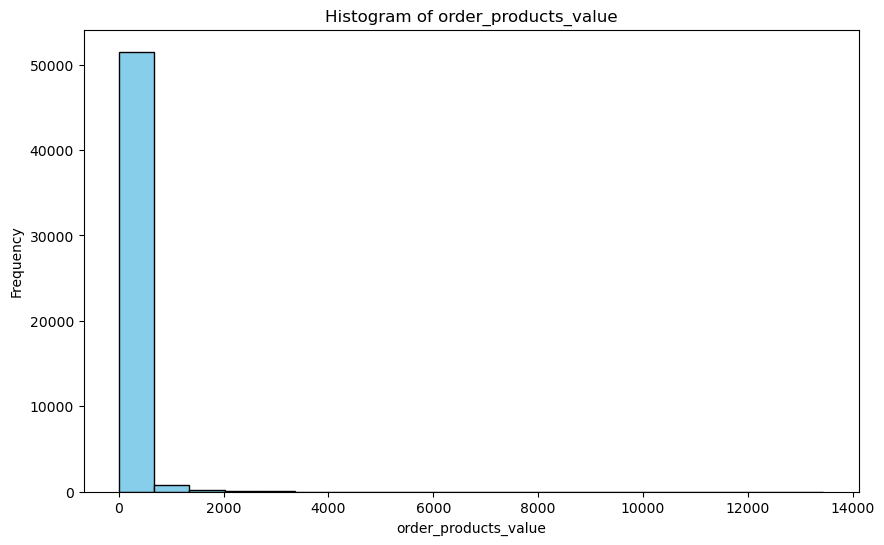

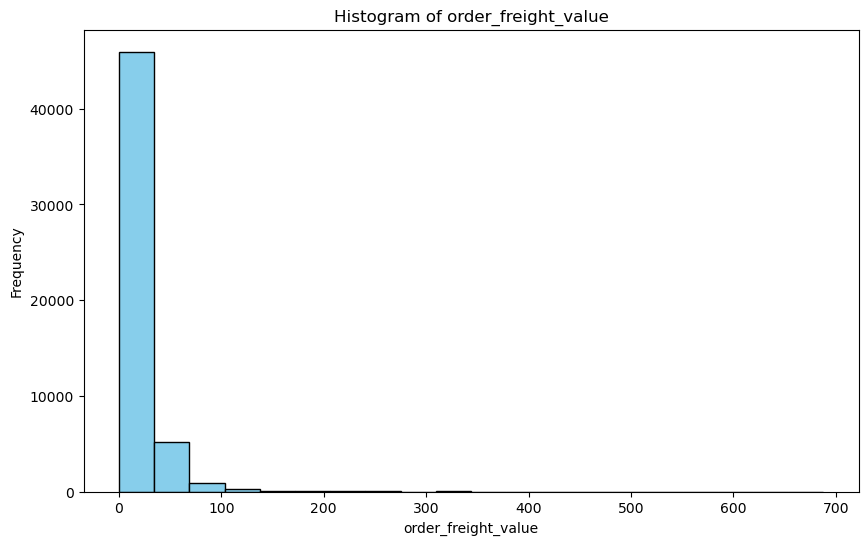

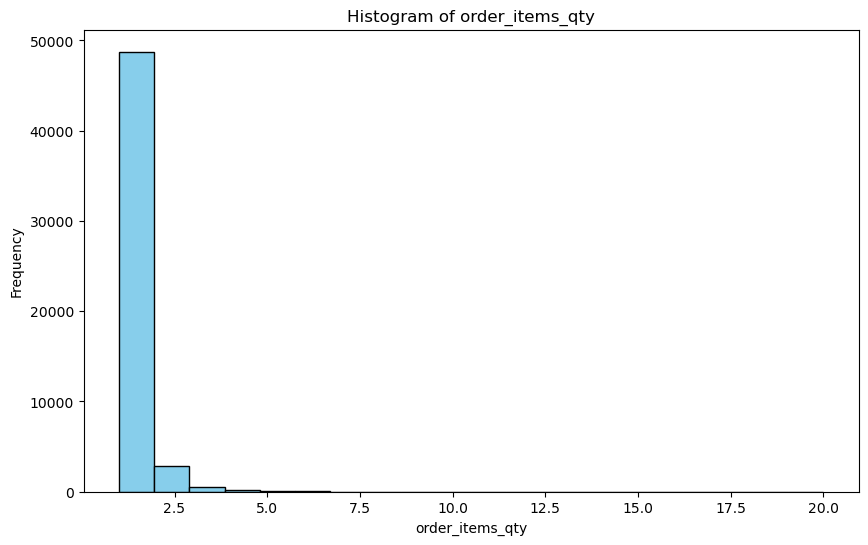

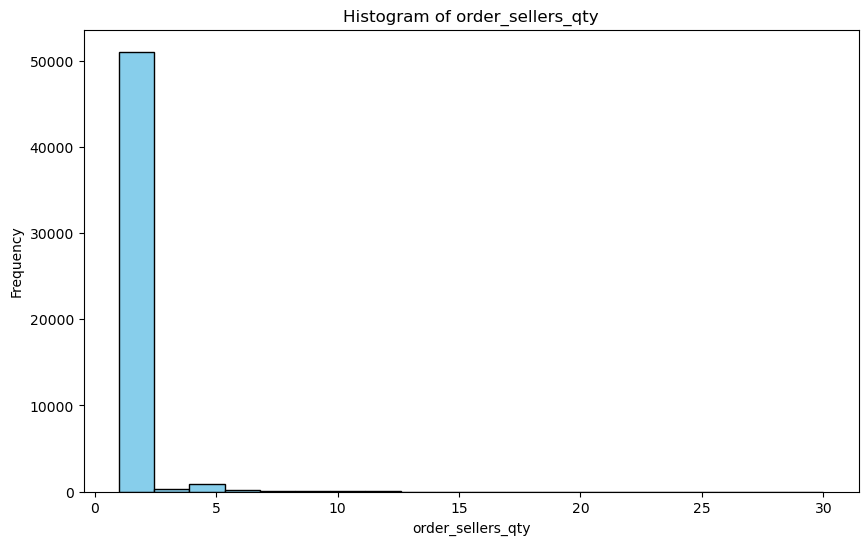

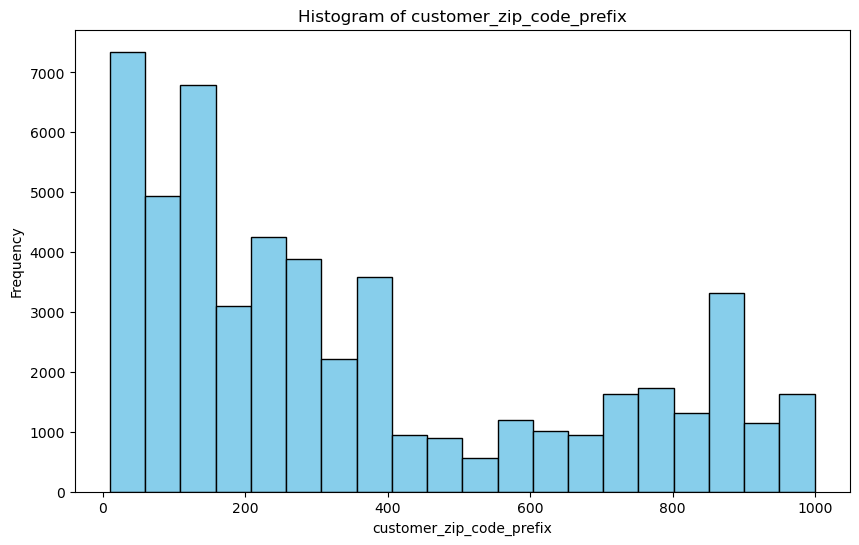

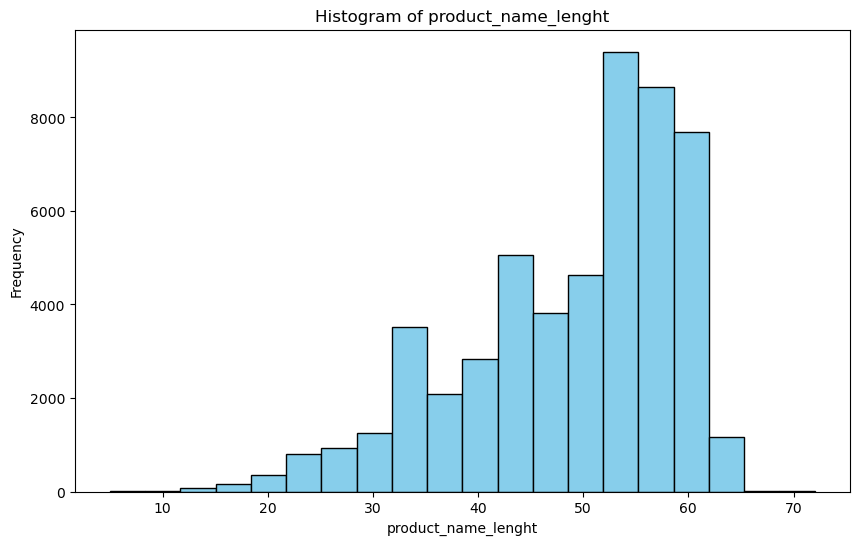

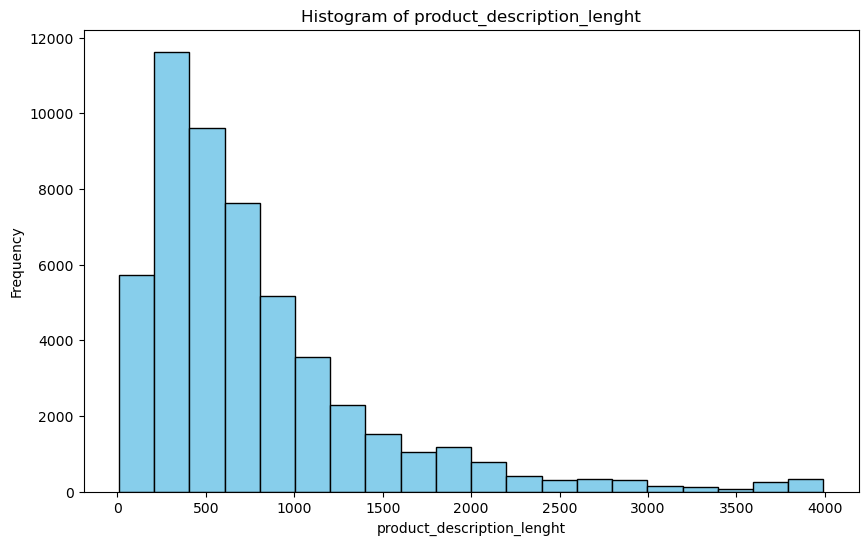

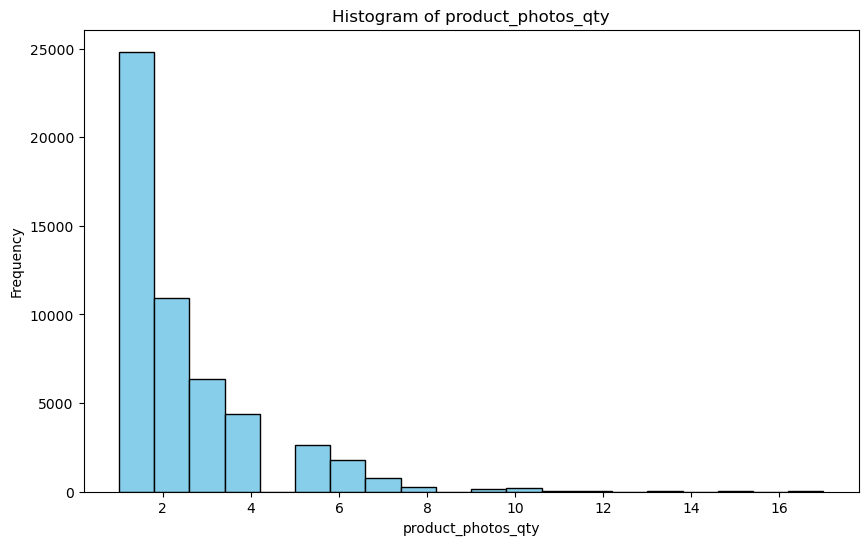

In [18]:
 import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# Replace `data` with the name of your DataFrame
float64_columns = data.select_dtypes(include=['float64']).columns

# Iterate over each float64 column and create a histogram
for column in float64_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')  # Adjust number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


#### Correlations

Esto la verdad lo puse aquí pero luego no le he hecho nada de caso porque hago el preprocesado más automático con feature selection y tal asi que a lo mejor ni lo pondría en el report.

In [19]:
data.dtypes

order_status                      object
order_products_value             float64
order_freight_value              float64
order_items_qty                  float64
order_sellers_qty                float64
                                  ...   
product_category_name_english     object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
target                             int64
Length: 17, dtype: object

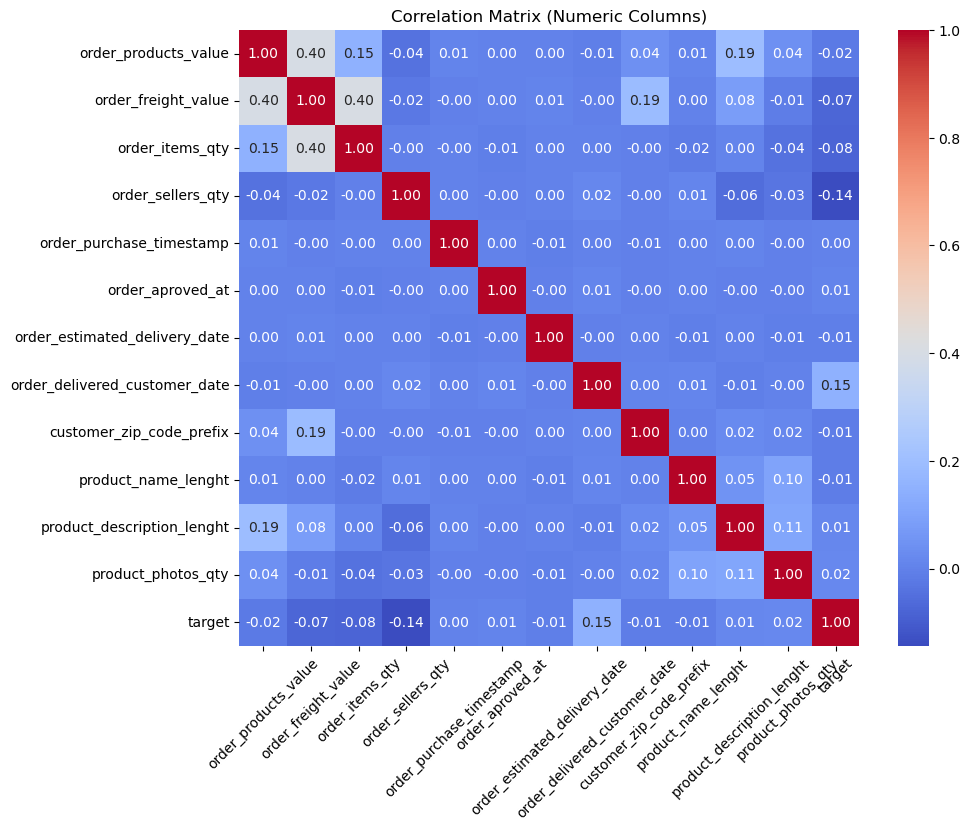

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is your DataFrame
# Replace `data` with the name of your DataFrame

# Select only the numeric columns (int64, float64, datetime64[ns])
numeric_columns = data.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns

# Compute the correlation matrix for numeric columns
corr_matrix = data[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and adjust plot settings
plt.title('Correlation Matrix (Numeric Columns)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



### 1.9. Outliers

Main columns with outliers: order_products_value, order_freight_value, order_items_qty, order_sellers_qty

Tiene sentido que haya outliers por las distribuciones que hemos observado antes, sin embargo, para el objetivo del problema los outliers pueden dar mucha información, ya que tal vez para productos que son más caros o en pedidos que hay más productos hay más o menos problemas en cuanto al pedido, y por tanto más o menos estrellas. Por ello, observando los tipos de outliers podemos decir que no son debido a datos sucios si no que son informativos.

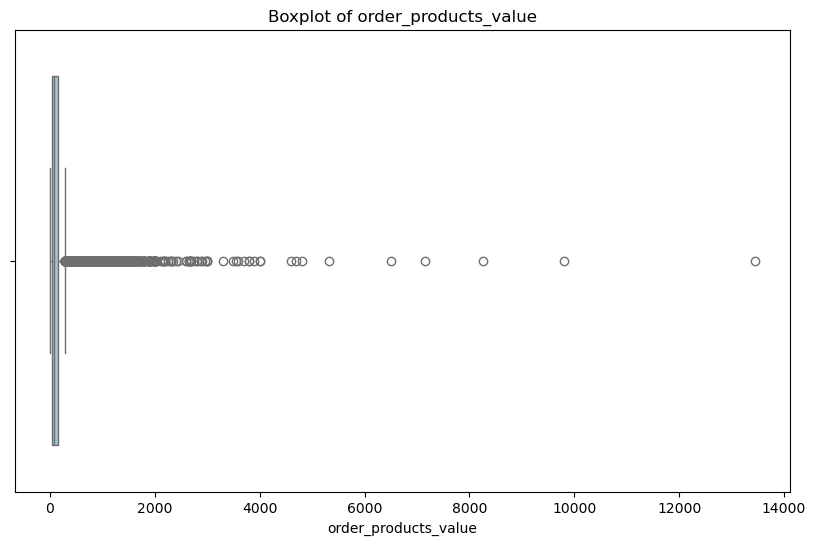

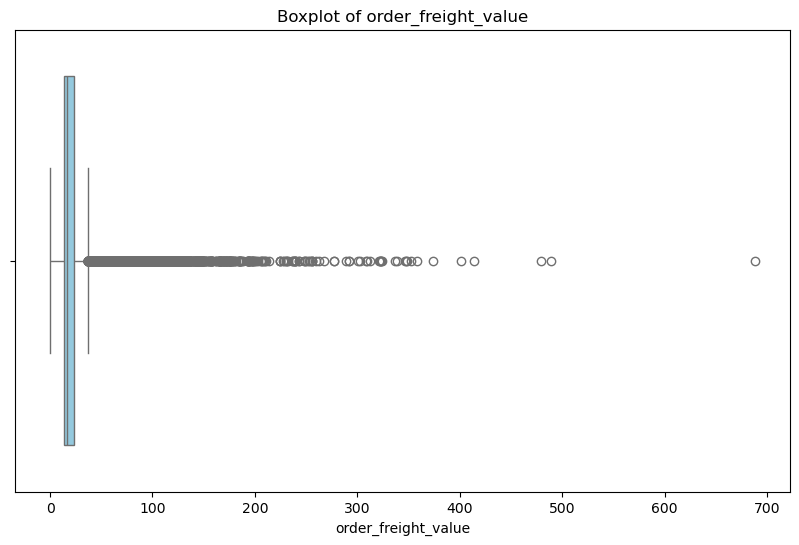

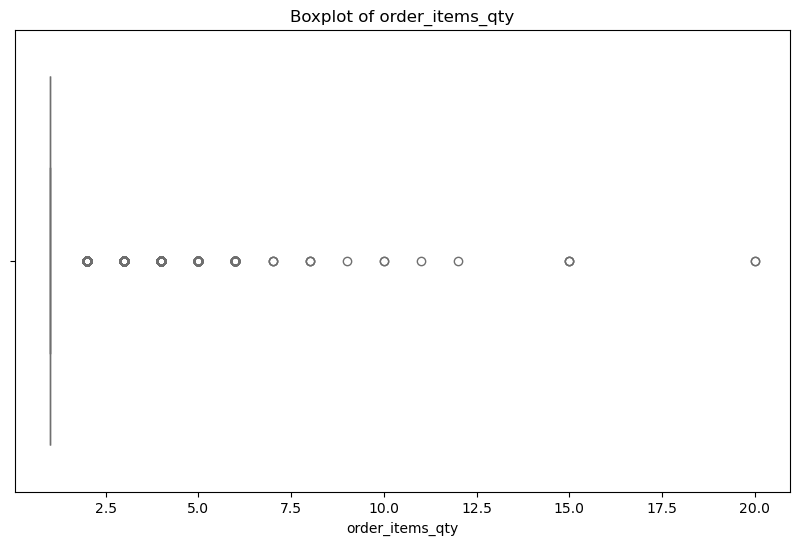

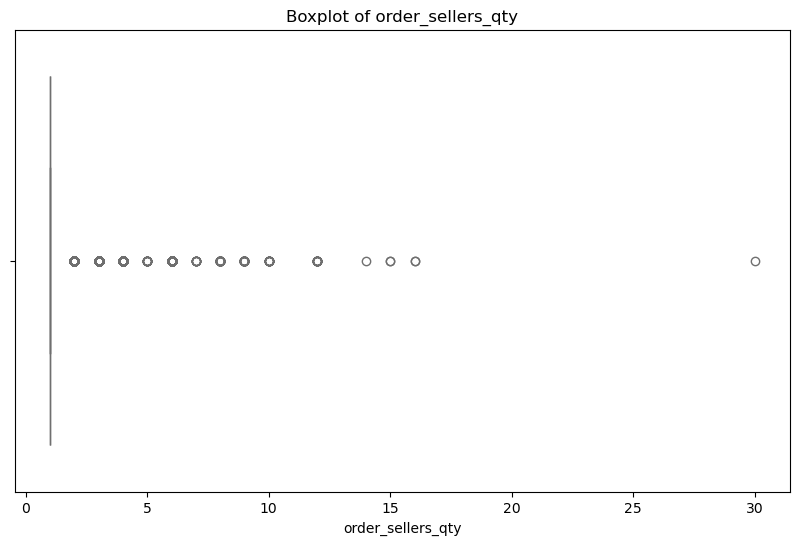

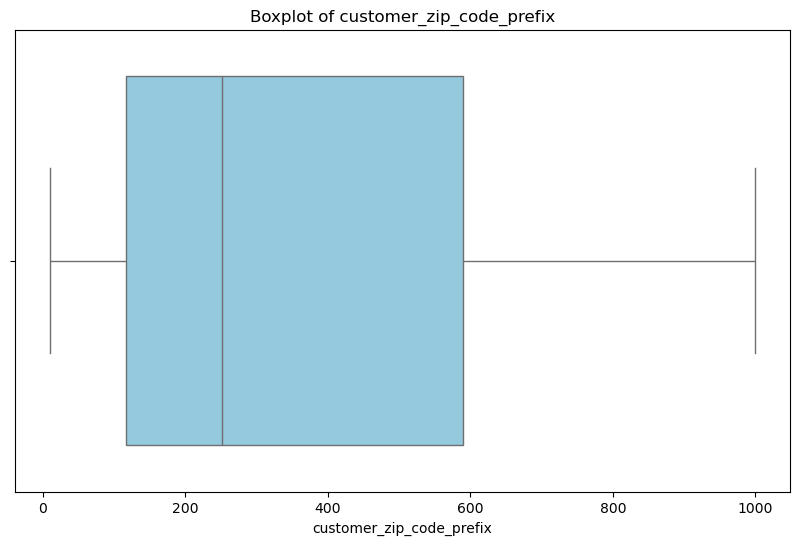

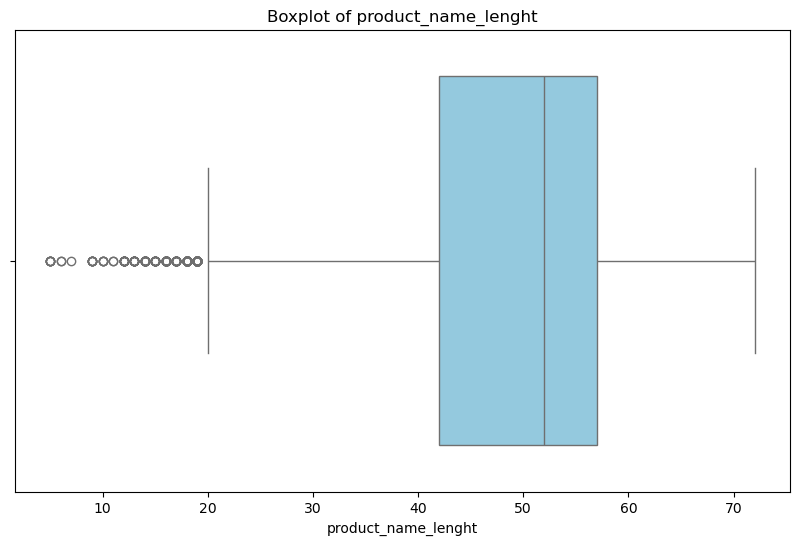

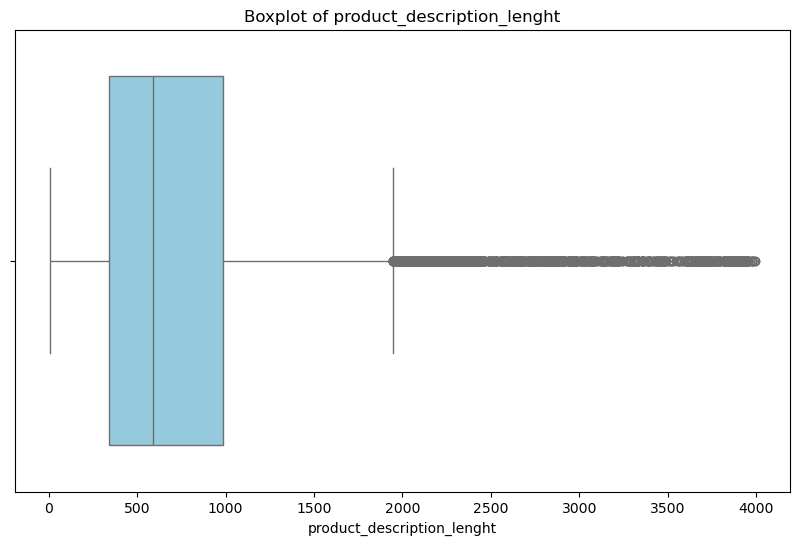

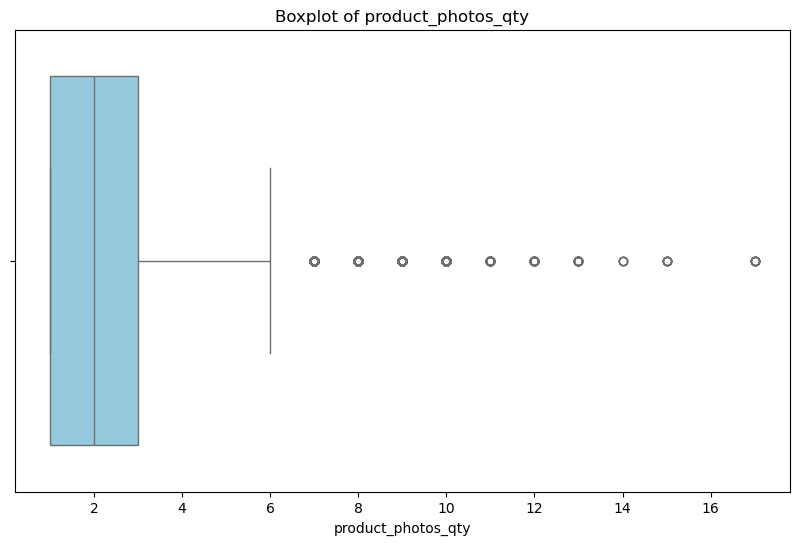

In [21]:
# Iterate over each float64 column and create a boxplot
for column in float64_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

## 2. Strategy

#### First plan

Issues to address: 
- Imputation
- Feature selection o regularization
- Umbalanced Data

Strategy:
Las columnas de fecha por si solas no dan información, pero por lo que veo el problema es de predecir el numero de estrellas que le da un comprador a su pedido, entonces entiendo que algo importante es si se entregó en la fecha adecuada o no. Por eso, voy a hacer feature engineering y crear nuevas columnas que sean la diferencia entre fecha de pedido y llegada del paquete, y fecha estimada de llegada y la llegada real. No se si meter algo de la fecha de aprovacion porque normalmente no importa tanto.

Luego, todas las categorias (product_category_name_english) que tengan menos de 50 pedidos, van a ir fuera, porque hay demasiadas y es peor hacer luego one-hot-encoding.

Además, no se si hacer lo mismo para la columna de ciudad o directamente quitarla porque esta la de estado, y la del zip code (Pero me preocupa mas la de ciudad porque al ser categorica molesta mas, el zip code problablemente en la feature selection ni se elija).

Antes de hacer ningún preprocesado con pipelines, probamos varios modelos sencillos en el raw data data ver que es mejor usar para medir.


Una vez hecho todo esto a mano, empezamos por lo que más preocupa: los valores nulos (la seleccion de features se puede hacer luego porque en verdad no tenemos tantas columnas, y cuanta mas informacion haya para rellenar los nulos mejor).




#### Second plan

Todo lo dicho antes se mantiene, se hacen las columnas de delivering_time y delivering_delay (aproval time no funciona bien). Se filtran los pedidos con menos de 50 repeticiones del nombre y al final eliminamos city porque se hicieron pruebas con ella y sin ella y ensuciaba mucho las predicciones.

Luego, antes del preprocesado se probaron varios modelos para elegir con cual preprocesar y salio la LinearRegression. Con ella, se hacen en este orden: imputacion, scaling y outliers. Hay decisiones que no comprobamos como el hacer one-hot encoding, pero simplemente pensamos que era el mejor approach para este problema, ya que otros metodos de codificación no eran tan útiles.

Para imputación elegimos: IterativeImputer
Scaling: NO SCALING!
Outliers: intentamos quitarlos y empeorsa mucho, lo que confirma que los outliers en este caso son informativos

Una vez elejida la pipeline base, nos pusimos a probar modelos. PARA CADA MODELO SE PROBARON DISTINTOS VALORES DE K PARA LA FEATURE SELECTION, YA QUE SE VIO QUE NO SE ESCOGÍAN LOS MISMOS VALORES EN EL RANDOM FOREST QUE EN EL GRADIENT BOOSTING. Es importante tener en cuenta que después del one hot encoding hay 89 columnas (6 for order_status, 27 for customer_state, 45 for product_category_name_english and the rest numerical)

Entonces, después de probar con muchos modelos y parámetros (hyperparameter tuning para cada modelo, también podemos comentar que entre los modelos que se intentaron, al ver que el gradient boosting funcionaba, se intentó hacer un GB con weigthed loss function basado en la distribución de la target en el train, sin embargo al subir vimos que los resultados no eran los esperados, esto ocurre porque realmente no conocemos la distribucion de la target en el test, podría haber sido la misma que el train pero no fue el caso), encontramos los 3 mejores con los que hacemos un emsemble, que nos da nuestro modelo final.

Estos 3 modelos son: RF, GB y GB with regularization (buscar algo más de info sobre esto pero es como que se puede hacer el GB pero con los parametros lambda y alpha se regulariza)

## 3. Preprocessing 

### 3.1. Feauture engineering, filtering and deleting some columns

In [22]:

# Calculate delivering_time (difference between order_purchase_timestamp and order_delivered_customer_date)
data['delivering_time'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

# Calculate delivering_delay (difference between order_estimated_delivery_date and order_delivered_customer_date)
data['delivering_delay'] = (data['order_delivered_customer_date'] - data['order_estimated_delivery_date']).dt.days
# he testeado abajo y el aproval time no vale pa nada!
#data['aproval_time'] = (data['order_aproved_at'] - data['order_purchase_timestamp']).dt.seconds // 3600

# Display the updated dataframe
# Drop the unnecessary columns
data.drop(columns=['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date'], inplace=True)

# Display the updated dataframdata

In [23]:
data

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,target,delivering_time,delivering_delay
0,delivered,39.90,15.38,1.0,1.0,Sao Paulo,SP,44.0,consoles_games,59.0,434.0,3.0,5,5.0,-2.0
1,delivered,279.99,31.82,NaN,1.0,Sao Paulo,SP,51.0,housewares,35.0,1800.0,1.0,3,8.0,-6.0
2,delivered,144.90,16.77,1.0,1.0,NaN,PR,842.0,health_beauty,63.0,580.0,5.0,5,10.0,-12.0
3,delivered,170.00,16.82,1.0,1.0,Santa Gertrudes,SP,135.0,watches_gifts,35.0,514.0,2.0,5,9.0,-12.0
4,delivered,40.90,14.10,1.0,1.0,Sao Paulo,SP,40.0,health_beauty,31.0,2392.0,2.0,5,15.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,delivered,49.00,13.71,1.0,1.0,Sao Paulo,SP,48.0,toys,54.0,77.0,2.0,5,10.0,-10.0
55196,delivered,62.80,34.24,NaN,1.0,Campina Grande,PB,584.0,market_place,55.0,1626.0,1.0,5,21.0,-7.0
55197,delivered,24.90,7.43,1.0,1.0,Aruja,SP,74.0,bed_bath_table,57.0,74.0,1.0,5,2.0,-7.0
55198,delivered,39.99,12.79,1.0,1.0,Presidente Prudente,SP,190.0,health_beauty,NaN,216.0,1.0,1,9.0,-16.0


In [24]:
# Use value_counts to get the unique values and their counts
category_counts = data['product_category_name_english'].value_counts()

#quitamos las categorias 
# Filter the DataFrame to keep only the rows with category counts greater than or equal to 50
df_filtered = data[data['product_category_name_english'].isin(category_counts[category_counts >= 50].index)]

# Display the filtered DataFrame
df_filtered

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,target,delivering_time,delivering_delay
0,delivered,39.90,15.38,1.0,1.0,Sao Paulo,SP,44.0,consoles_games,59.0,434.0,3.0,5,5.0,-2.0
1,delivered,279.99,31.82,NaN,1.0,Sao Paulo,SP,51.0,housewares,35.0,1800.0,1.0,3,8.0,-6.0
2,delivered,144.90,16.77,1.0,1.0,NaN,PR,842.0,health_beauty,63.0,580.0,5.0,5,10.0,-12.0
3,delivered,170.00,16.82,1.0,1.0,Santa Gertrudes,SP,135.0,watches_gifts,35.0,514.0,2.0,5,9.0,-12.0
4,delivered,40.90,14.10,1.0,1.0,Sao Paulo,SP,40.0,health_beauty,31.0,2392.0,2.0,5,15.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,delivered,49.00,13.71,1.0,1.0,Sao Paulo,SP,48.0,toys,54.0,77.0,2.0,5,10.0,-10.0
55196,delivered,62.80,34.24,NaN,1.0,Campina Grande,PB,584.0,market_place,55.0,1626.0,1.0,5,21.0,-7.0
55197,delivered,24.90,7.43,1.0,1.0,Aruja,SP,74.0,bed_bath_table,57.0,74.0,1.0,5,2.0,-7.0
55198,delivered,39.99,12.79,1.0,1.0,Presidente Prudente,SP,190.0,health_beauty,NaN,216.0,1.0,1,9.0,-16.0


In [25]:
df_filtered['product_category_name_english'].nunique()

45

In [26]:
# Solo hemos eliminado el 5.7 %, creo que podemos hacerlo sin miedo
((55200 - 52046) * 100) / 55200


5.713768115942029

C:\Users\victoria\AppData\Local\Temp\ipykernel_12688\4031695662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_category_name_english', data=df_filtered, palette='viridis')


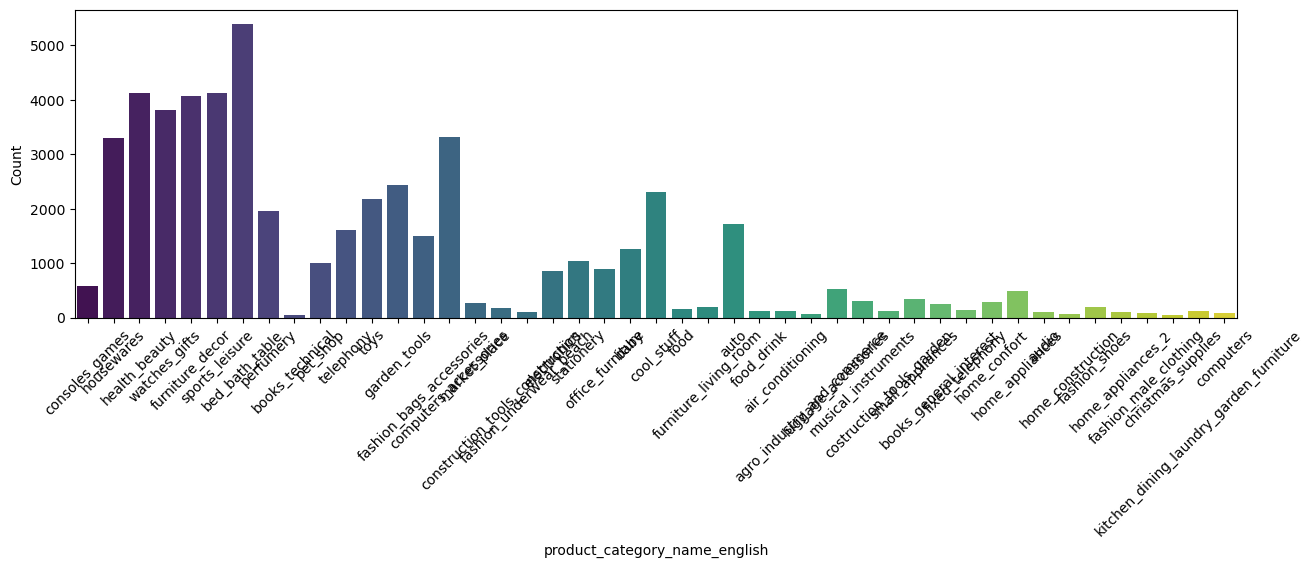

In [27]:
plt.figure(figsize=(15, 4))  # Adjust figure size if needed
sns.countplot(x='product_category_name_english', data=df_filtered, palette='viridis')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [28]:

for column in df_filtered.columns.tolist():
    num_categories = data[column].nunique()
    print(f"Number of categories in column '{column}': {num_categories}")

Number of categories in column 'order_status': 6
Number of categories in column 'order_products_value': 4575
Number of categories in column 'order_freight_value': 6138
Number of categories in column 'order_items_qty': 14
Number of categories in column 'order_sellers_qty': 15
Number of categories in column 'customer_city': 3388
Number of categories in column 'customer_state': 27
Number of categories in column 'customer_zip_code_prefix': 846
Number of categories in column 'product_category_name_english': 70
Number of categories in column 'product_name_lenght': 62
Number of categories in column 'product_description_lenght': 2519
Number of categories in column 'product_photos_qty': 16
Number of categories in column 'target': 5
Number of categories in column 'delivering_time': 120
Number of categories in column 'delivering_delay': 166


In [29]:
df_filtered.dtypes

order_status                   object
order_products_value          float64
order_freight_value           float64
order_items_qty               float64
order_sellers_qty             float64
                               ...   
product_description_lenght    float64
product_photos_qty            float64
target                          int64
delivering_time               float64
delivering_delay              float64
Length: 15, dtype: object

In [30]:

# Drop the original 'customer_city' column
df_filtered.drop('customer_city', axis=1, inplace=True)


C:\Users\victoria\AppData\Local\Temp\ipykernel_12688\2177445536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('customer_city', axis=1, inplace=True)


### 3.2. Stratified Sampling (Holdout split (train-train, train-validation, test))

Para tratar con las umbalaced classes, intentamos que la divir en train y train validation haya datos de todas las targets mas o menos.

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

# Splitting the data into training and test sets
train_data = df_filtered

validation_size = 0.2

# Divide the data into train and test splits (keeping the same ratio of target variable)
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=validation_size, random_state=42)
for train_index, validation_index in stratified_splitter.split(train_data, train_data['target']):
    train_train = train_data.iloc[train_index]
    train_validation = train_data.iloc[validation_index]

# Print the sizes of the splits
print("Training split size:", len(train_train))
print("Validation split size:", len(train_validation))

# Set features and target for TOTAL train
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

# Features and target for train-train
X_train_train = train_train.drop('target', axis=1)
y_train_train = train_train['target']

# Features and target for train-validation
X_train_validation = train_validation.drop('target', axis=1)
y_train_validation = train_validation['target']


Training split size: 41602
Validation split size: 10401


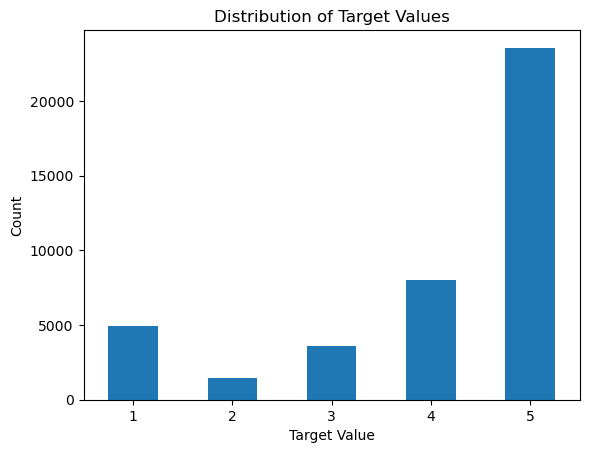

In [32]:
y_train_train.value_counts().sort_index().plot(kind='bar')

plt.title('Distribution of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

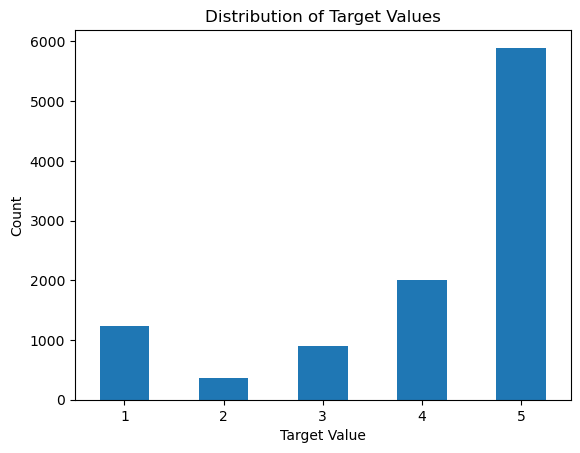

In [33]:
y_train_validation.value_counts().sort_index().plot(kind='bar')

plt.title('Distribution of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

### 3.3. Baseline models with raw data

Aquí hice el dummy model para eso de que nuestro modelo siempre tiene que ser mejor que le dummy pero vamos que en este caso no hace falta porque el problema era muy complejo y el dummy no sirve para nada.

#### Dummy model

In [34]:
# Create a DataFrame to store results
random_state= 100516919

results_df = pd.DataFrame(columns=['Model', 'R2', 'Training Time'])

# Function to add results to the DataFrame
def add_result(model_name, mae, training_time):
    results_df.loc[len(results_df)] = [model_name, mae, training_time]

indices = ([-1] * len(X_train_train)) + ([0] * len(X_train_validation))
inner = PredefinedSplit(indices)

dummy_reg =DummyRegressor(strategy='mean')

# Measure training time
start_time = time.time()

# Fit the model and calculate scores
dummy_scores = cross_val_score(dummy_reg, X_train, y_train, cv=inner, scoring='r2')

# Measure end time
end_time = time.time()

training_time= end_time-start_time

# Add results to the DataFrame
add_result('Dummy Mean', dummy_scores.mean(), training_time)

# Print the results DataFrame
results_df

,Model,R2,Training Time
0,Dummy Mean,-0.000736,0.01399


#### Basic models

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Specify numeric and non-numeric columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
'''
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'KNN Regression': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision Trees': DecisionTreeRegressor()
}

# Loop through models and evaluate
for name, model in models.items():
    pipeline= Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
        ]), non_numeric_columns)
    ])), 
    ('regressor', model)
])


    # Measure training time
    start_time = time.time()

    # Fit the pipeline and calculate scores
    scores = cross_val_score(pipeline, X_train, y_train, cv=inner, scoring='r2')

    # Measure end time
    end_time = time.time()

    training_time = end_time - start_time


    add_result(name, scores.mean(), training_time)

results_df
'''

"\n# Define models\nmodels = {\n    'Linear Regression': LinearRegression(),\n    'Ridge Regression': Ridge(),\n    'Lasso Regression': Lasso(),\n    'ElasticNet Regression': ElasticNet(),\n    'KNN Regression': KNeighborsRegressor(),\n    'SVR': SVR(),\n    'Decision Trees': DecisionTreeRegressor()\n}\n\n# Loop through models and evaluate\nfor name, model in models.items():\n    pipeline= Pipeline([\n    ('preprocessor', ColumnTransformer([\n        ('numeric', Pipeline([\n            ('imputer', SimpleImputer(strategy='mean'))\n        ]), numeric_columns),\n        ('categorical', Pipeline([\n            ('imputer', SimpleImputer(strategy='constant')),\n            ('encoder', OneHotEncoder(handle_unknown= 'ignore'))\n        ]), non_numeric_columns)\n    ])), \n    ('regressor', model)\n])\n\n\n    # Measure training time\n    start_time = time.time()\n\n    # Fit the pipeline and calculate scores\n    scores = cross_val_score(pipeline, X_train, y_train, cv=inner, scoring='r2')\n\n

Elejimos el Linear Regressor para hacer el preprocesado y elegir metodos de imputacion y scaling, porque es el que mejor funciona.



### 3.4. Imputation


Important before starting: we have decided to perform onehotencoding for all the categorical variables except from city, which has too many values, and has been erased.

In [36]:
# Load a sample dataset for demonstration
X = X_train
y = y_train

# Define the holdout split
indices = ([-1] * len(X_train_train)) + ([0] * len(X_train_validation))
inner = PredefinedSplit(indices)
# Create a new pipeline with imputation after feature selection
pipeline_simple_imputer= Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', SimpleImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer()),
            ('encoder', OneHotEncoder())
        ]), non_numeric_columns)
    ])), 
    ('regressor', LinearRegression())
])



# Define the hyperparameter grid for GridSearchCV
param_grid_si = {
    'preprocessor__numeric__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant']
}

# Use GridSearchCV to find the best parameter
grid_search = GridSearchCV(pipeline_simple_imputer, param_grid_si, cv=inner, scoring='r2', n_jobs=-1, error_score='raise')
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Access the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Access the R2 score for the best model
best_score = grid_search.best_score_
print("R2 for the Best Model:", best_score)

Best Hyperparameters: {'preprocessor__categorical__imputer__strategy': 'constant', 'preprocessor__numeric__imputer__strategy': 'median'}
R2 for the Best Model: 0.193490813809027


In [37]:
# train-train data
X = X_train_train
y = y_train_train

# Create a new pipeline with imputation after feature selection
pipeline_iterative_imputer = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder())
        ]), non_numeric_columns)
    ])), 
    ('regressor', LinearRegression())
])



pipeline_iterative_imputer.fit(X, y)

# Make predictions on the test set
y_pred = pipeline_iterative_imputer.predict(X_train_validation)

# Calculate and print the Mean Absolute Error (MAE)
r2 = r2_score(y_train_validation, y_pred)
print(f"Iterative imputer R2: {r2}")

Iterative imputer R2: 0.1986314194199158


In [38]:
"""
# Load a sample dataset for demonstration
X = X_train_train
y = y_train_train

# Create a new pipeline with imputation after feature selection
pipeline_KNN_imputer = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', KNNImputer()),
            ('scaler', StandardScaler())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder())
        ]), non_numeric_columns)
    ])), 
    ('regressor', LinearRegression())
])


pipeline_KNN_imputer.fit(X, y)

# Make predictions on the test set
y_pred = pipeline_KNN_imputer.predict(X_train_validation)

# Calculate and print the Mean Absolute Error (MAE)
r2 = r2_score(y_train_validation, y_pred)
print(f"KNN imputer r2: {r2}")"""

'\n# Load a sample dataset for demonstration\nX = X_train_train\ny = y_train_train\n\n# Create a new pipeline with imputation after feature selection\npipeline_KNN_imputer = Pipeline([\n    (\'preprocessor\', ColumnTransformer([\n        (\'numeric\', Pipeline([\n            (\'imputer\', KNNImputer()),\n            (\'scaler\', StandardScaler())\n        ]), numeric_columns),\n        (\'categorical\', Pipeline([\n            (\'imputer\', SimpleImputer(strategy=\'constant\')),\n            (\'encoder\', OneHotEncoder())\n        ]), non_numeric_columns)\n    ])), \n    (\'regressor\', LinearRegression())\n])\n\n\npipeline_KNN_imputer.fit(X, y)\n\n# Make predictions on the test set\ny_pred = pipeline_KNN_imputer.predict(X_train_validation)\n\n# Calculate and print the Mean Absolute Error (MAE)\nr2 = r2_score(y_train_validation, y_pred)\nprint(f"KNN imputer r2: {r2}")'

mejor opción 


In [39]:
pipeline_imputation = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer()),
            ('scaler', StandardScaler())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder())
        ]), non_numeric_columns)
    ])), 
    ('regressor', LinearRegression())
])


### 3.5. Scaling

In [40]:
## NO SCALING

# train-train data
X = X_train_train
y = y_train_train

# Create a new pipeline with imputation after feature selection
pipeline_standard_scaler = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder())
        ]), non_numeric_columns)
    ])), 
    ('regressor', LinearRegression())
])



pipeline_standard_scaler.fit(X, y)

# Make predictions on the test set
y_pred = pipeline_standard_scaler.predict(X_train_validation)

# Calculate and print the Mean Absolute Error (MAE)
r2 = r2_score(y_train_validation, y_pred)
print(f"nO Scaler R2: {r2}")


nO Scaler R2: 0.1986314194199158


In [41]:
# train-train data
X = X_train_train
y = y_train_train

# Create a new pipeline with imputation after feature selection
pipeline_standard_scaler = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer()),
            ('scaler', StandardScaler())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder())
        ]), non_numeric_columns)
    ])), 
    ('regressor', LinearRegression())
])



pipeline_standard_scaler.fit(X, y)

# Make predictions on the test set
y_pred = pipeline_standard_scaler.predict(X_train_validation)

# Calculate and print the Mean Absolute Error (MAE)
r2 = r2_score(y_train_validation, y_pred)
print(f"Standard Scaler R2: {r2}")

Standard Scaler R2: 0.1979642981866333


In [42]:

# train-train data
X = X_train_train
y = y_train_train

# Create a new pipeline with imputation after feature selection
pipeline_minmax_scaler = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer()),
            ('scaler', MinMaxScaler())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder())
        ]), non_numeric_columns)
    ])), 
    ('regressor', LinearRegression())
])



pipeline_minmax_scaler.fit(X, y)

# Make predictions on the test set
y_pred = pipeline_minmax_scaler.predict(X_train_validation)

# Calculate and print the Mean Absolute Error (MAE)
r2 = r2_score(y_train_validation, y_pred)
print(f"MinMax Scaler R2: {r2}")

MinMax Scaler R2: 0.19796202787952943


In [43]:
# train-train data
X = X_train_train
y = y_train_train

# Create a new pipeline with imputation after feature selection
pipeline_robust_scaler = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer()),
            ('scaler', RobustScaler())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder())
        ]), non_numeric_columns)
    ])), 
    ('regressor', LinearRegression())
])



pipeline_robust_scaler.fit(X, y)

# Make predictions on the test set
y_pred = pipeline_robust_scaler.predict(X_train_validation)

# Calculate and print the Mean Absolute Error (MAE)
r2 = r2_score(y_train_validation, y_pred)
print(f"Robust Scaler R2: {r2}")

Robust Scaler R2: 0.19796788573832302


### 3.6. Outliers

Ni caso empeora muchisimo (una idea sería usar el robust sampler mejor, pero es que como sale igual que le standard no se)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import mstats

# Define Winsorizer transformer
class Winsorizer:
    def __init__(self, lower=0.05, upper=0.95):
        self.lower = lower
        self.upper = upper
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return mstats.winsorize(X, limits=(self.lower, self.upper))

# Load a sample dataset for demonstration
X = X_train
y = y_train

# Define the holdout split
indices = ([-1] * len(X_train_train)) + ([0] * len(X_train_validation))
inner = PredefinedSplit(indices)

# Create a new pipeline with imputation, Winsorization, and feature encoding
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer()),  # Impute missing values
            ('winsorizer', Winsorizer())  # Winsorize outliers) 
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),  # Impute missing values
            ('encoder', OneHotEncoder())  # One-hot encode categorical features
        ]), non_numeric_columns)
    ])),
    ('regressor', LinearRegression())  # Your chosen regressor (Linear Regression)
])

# Fit the pipeline
pipeline.fit(X, y)

# Make predictions on the test set
y_pred = pipeline.predict(X_train_validation)

# Calculate and print the Mean Absolute Error (MAE)
r2 = r2_score(y_train_validation, y_pred)
print(f"Outliers dealing R2: {r2}")
# Now, you can use this pipeline for prediction or further evaluation.


Outliers dealing R2: 0.08052940668540931


## 3.5. Final pipeline

In [45]:
pipeline= Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
        ]), non_numeric_columns)
    ])),('feature_selection', SelectKBest()),
    ('regressor', RandomForestRegressor(random_state=random_state))
])


## 4. Modeling


In [46]:
## how many columns do we have? 89 (6 for order_status, 27 for customer_state, 45 for product_category_name_english and the rest numerical)


CONCLUSION: MEJOR USAR ONE HOT + FEATURE SELECTION (pero no ponemos k=15 porque parece que para gradient boosting hacen falta más, volvemos a testear)

### 4.1. Random Forest
Cuidado, esto tarda mucho.

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import PredefinedSplit, GridSearchCV
import numpy as np

# DATA
X = X_train
y = y_train

# Define the holdout split: train-train and train-validation 
indices = ([-1] * len(X_train_train)) + ([0] * len(X_train_validation))
inner = PredefinedSplit(indices)

pipeline_feature_selection = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])),
    ('feature_selection', SelectKBest(k=60)),
    ('regressor', RandomForestRegressor(random_state=random_state))
])

# Define the hyperparameter grid for GridSearchCV
param_grid_fs = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__max_depth': [3, 5, 7],
    'regressor__max_features':[0.2,0.4,0.6,0.8,1]
}

# Use GridSearchCV to find the best combination of parameters
grid_search = RandomizedSearchCV(pipeline_feature_selection, param_grid_fs, cv=inner, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_params_rf = grid_search.best_params_
print(f"Best parameters: {best_params_rf}")

# Access the R2 score of the best model
best_score = grid_search.best_score_
print("R2 for the Best Model:", best_score)


Best parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 10, 'regressor__max_features': 0.8, 'regressor__max_depth': 7}
R2 for the Best Model: 0.243494625028558


### 4.2. Gradient Boosting

In [48]:
# DATA
random_state= 100516919

X = X_train
y = y_train

# Define the holdout split: train-train and train-validation 
indices = ([-1] * len(X_train_train)) + ([0] * len(X_train_validation))
inner = PredefinedSplit(indices)

pipeline_feature_selection = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])),
    ('feature_selection', SelectKBest(k=80)),
    ('regressor', GradientBoostingRegressor(random_state=random_state))
])

# Define the hyperparameter grid for GridSearchCV
param_grid_fs = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.05, 0.1, 0.2]
}

# Use GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(pipeline_feature_selection, param_grid_fs, cv=inner, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Access the R2 score of the best model
best_score = grid_search.best_score_
print("R2 for the Best Model:", best_score)

Best parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
R2 for the Best Model: 0.25763894864290626


### 4.3. Gradient boosting with XGBoost

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.feature_selection import SelectKBest
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# DATA
random_state = 100516919

# Define your data
X = X_train
y = y_train

# Define the holdout split: train-train and train-validation 
indices = ([-1] * len(X_train_train)) + ([0] * len(X_train_validation))
inner = PredefinedSplit(indices)

# Define the pipeline
pipeline_feature_selection = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])),
    ('feature_selection', SelectKBest(k=88)),
    ('regressor', XGBRegressor(random_state=random_state, objective='reg:squarederror', booster='gbtree'))  
])

# Define the hyperparameter grid for GridSearchCV
param_grid_fs = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__reg_alpha': [0.05,0.1,0.2],
    'regressor__reg_lambda': [0.05,0.1,0.2]
}

# Use GridSearchCV to find the best combination of parameters
grid_search = RandomizedSearchCV(pipeline_feature_selection, param_grid_fs, cv=inner, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_params_xgb = grid_search.best_params_
print(f"Best parameters: {best_params_xgb}")

# Access the R2 score of the best model
best_score = grid_search.best_score_
print("R2 for the Best Model:", best_score)


C:\Users\victoria\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [17:10:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'regressor__reg_lambda': 0.1, 'regressor__reg_alpha': 0.2, 'regressor__n_estimators': 100, 'regressor__min_samples_split': 10, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.05}
R2 for the Best Model: 0.25828675023824865


### 4.4. Ensemble (2 models)

In [50]:
from sklearn.ensemble import VotingRegressor

# Define the pipeline for Ridge regression
pipeline_GB = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
        ]), non_numeric_columns)
    ])), ('feature_selection', SelectKBest(k=80)),
    ('regressor',GradientBoostingRegressor(**best_params, random_state=random_state))
])

#'regressor__n_estimators': 50, 'regressor__min_samples_split': 10, 'regressor__max_features': 0.6, 'regressor__max_depth': 7, 'feature_selection__k': 50

# Define the pipeline for XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])),
    ('feature_selection', SelectKBest(k=88)),
    ('regressor', XGBRegressor(random_state=random_state, objective='reg:squarederror', booster='gbtree', **best_params_xgb))  
])

# best_params_xgb= {'regressor__reg_lambda': 0.2, 'regressor__reg_alpha': 0.05, 'regressor__n_estimators': 150, 'regressor__min_samples_split': 10, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.05}

# Define the ensemble of Ridge regression and XGBoost
ensemble = VotingRegressor([('RF', pipeline_GB), ('xgb', pipeline_xgb)])

# Define the hyperparameter grid for GridSearchCV
param_grid_ensemble = {
    'weights': [[0.5, 0.5], [0.6, 0.4], [0.4, 0.6]],  # weights for the voting
}

# Use GridSearchCV to find the best combination of parameters
grid_search_ensemble = RandomizedSearchCV(ensemble, param_grid_ensemble, cv=inner, scoring='r2', n_jobs=-1)
grid_search_ensemble.fit(X, y)

# Get the best model from the grid search
best_model_ensemble = grid_search_ensemble.best_estimator_
best_params_ensemble = grid_search_ensemble.best_params_
print(f"Best parameters for ensemble: {best_params_ensemble}")

# Access the R2 score of the best model
best_score_ensemble = grid_search_ensemble.best_score_
print("R2 for the Best Ensemble Model:", best_score_ensemble)


C:\Users\victoria\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

### 4.5. Ensemble (3 models)

He creado esta función porque no se porque para el xgboost si deja pasar los parametros tal cual salen del hyperparameter tunning pero para el RF y GB no, pero vamos una tontería.

In [58]:
def remove_regressor_prefix(params_dict):
    return {key.replace('regressor__', ''): value for key, value in params_dict.items()}

best_params = remove_regressor_prefix(best_params)

best_params_rf = remove_regressor_prefix(best_params_rf)

In [59]:
from sklearn.ensemble import VotingRegressor

# Define the pipeline for GB 
pipeline_GB = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
        ]), non_numeric_columns)
    ])), ('feature_selection', SelectKBest(k=80)),
    ('regressor', GradientBoostingRegressor(random_state=random_state, **best_params))
])

#'regressor__n_estimators': 50, 'regressor__min_samples_split': 10, 'regressor__max_features': 0.6, 'regressor__max_depth': 7, 'feature_selection__k': 50

# Define the pipeline for XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])),
    ('feature_selection', SelectKBest(k=88)),
    ('regressor', XGBRegressor(random_state=random_state, objective='reg:squarederror', booster='gbtree', **best_params_xgb))  
])
# Define the pipeline for RF
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])),
    ('feature_selection', SelectKBest(k=60)),
    ('regressor', RandomForestRegressor(random_state=random_state, **best_params_rf))
])

#{'regressor__n_estimators': 150, 'regressor__min_samples_split': 5, 'regressor__max_features': 0.6, 'regressor__max_depth': 7}
# Define the ensemble of Ridge regression, XGBoost, and Random Forest
ensemble = VotingRegressor([('RF', pipeline_GB), ('xgb', pipeline_xgb), ('RF_Reg', pipeline_rf)])

# Define the hyperparameter grid for GridSearchCV
param_grid_ensemble = {
    'weights': [[0.5, 0.3, 0.2], [0.4, 0.4, 0.2], [0.3, 0.5, 0.2]],  # weights for the voting
}

# Use GridSearchCV to find the best combination of parameters
grid_search_ensemble = RandomizedSearchCV(ensemble, param_grid_ensemble, cv=inner, scoring='r2', n_jobs=-1)
grid_search_ensemble.fit(X, y)

# Get the best model from the grid search
best_model_ensemble = grid_search_ensemble.best_estimator_
best_params_ensemble = grid_search_ensemble.best_params_
print(f"Best parameters for ensemble: {best_params_ensemble}")

# Access the R2 score of the best model
best_score_ensemble = grid_search_ensemble.best_score_
print("R2 for the Best Ensemble Model:", best_score_ensemble)

C:\Users\victoria\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\victoria\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [17:23:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "regressor__learning_rate", "regressor__max_depth", "regressor__min_samples_split", "regressor__n_estimators", "regressor__reg_alpha", "regressor__reg_lambda" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for ensemble: {'weights': [0.5, 0.3, 0.2]}
R2 for the Best Ensemble Model: 0.2604620591897844


## 5. Best model 

### 5.2. Training final model and predict

Train (using ALL THE DATA) and use it to make predictions on the “competition data”. Save both the final model and the competition predictions on files.

In [60]:
X = X_train
y= y_train

In [61]:
## Modelo 1: Tree sin city (mismos parametros que el 3)
## Modelo 2: GB: {'regressor__n_estimators': 50, 'regressor__min_samples_split': 5, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1}
## Modelo 3: tree: {'regressor__min_samples_split': 130, 'regressor__max_depth': 12}
## Mejor hasta ahora: Modelo 4: sin usar la city: GB:  {'regressor__n_estimators': 50, 'regressor__min_samples_split': 5, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1}
## Modelo 5: igual que el 4 pero con weigths
## Modelo 6: GB sin aproval time, sin city y con feature selection. parametros como en el modelo 4. 'feature_selection__k': 80, 'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
## Modelo 7: XGBoost
## Modelo 8: Ensemble GB 6 + XGBoost 7
## Modelo 9: Ensemble GB 6 + XGBoost 7 + RF
# Create the pipeline

pipeline_final = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])), 
    ('regressor', DecisionTreeRegressor(min_samples_split= 130, max_depth= 12, random_state=random_state))
])


pipeline_final = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])), 
    ('regressor', GradientBoostingRegressor(n_estimators= 50, min_samples_split= 5, max_depth= 7, learning_rate = 0.1, random_state=random_state))
])

pipeline_final = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
        ]), non_numeric_columns)
    ])), ('feature_selection', SelectKBest(k=80)),
    ('regressor',GradientBoostingRegressor(n_estimators= 50, min_samples_split= 5, max_depth= 5, learning_rate = 0.2, random_state=random_state))
])

pipeline_final= Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('imputer', IterativeImputer())
        ]), numeric_columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='constant')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), non_numeric_columns)
    ])),
    ('feature_selection', SelectKBest(k=88)),
    ('regressor', XGBRegressor(random_state=random_state, objective='reg:squarederror', booster='gbtree', **best_params_xgb))  
])

pipeline_final = VotingRegressor([('GB', pipeline_GB), ('xgb', pipeline_xgb)], weights=[0.6, 0.4])  # You can adjust the weights here
pipeline_final = VotingRegressor([('GB', pipeline_GB), ('xgb', pipeline_xgb), ('RF_Reg', pipeline_rf)], **best_params_ensemble)  # You can adjust the weights here




In [62]:
pipeline_final.fit(X,y)
# Fit the pipeline with sample weights
#pipeline_final.fit(X_train, y_train, regressor__sample_weight=sample_weights)


C:\Users\victoria\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [17:25:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "regressor__learning_rate", "regressor__max_depth", "regressor__min_samples_split", "regressor__n_estimators", "regressor__reg_alpha", "regressor__reg_lambda" } are not used.

  warnings.warn(smsg, UserWarning)


VotingRegressor(estimators=[('GB',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer())]),
                                                                               Index(['order_products_value', 'order_freight_value', 'order_items_qty',
       'order_sellers_qty', 'customer_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'de...
                                                                                                SimpleImputer(strategy='constant')),
                                                                                               ('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['order_status', 'customer_state', 'product_category_name_english'], dtype='object'))])),
                                             ('feature_selection',
                                              SelectKBest(k=60)),
                                             ('regressor',
                                              RandomForestRegressor(max_depth=7,
                                                                    max_features=0.8,
                                                                    min_samples_split=10,
                                                                    random_state=100516919))]))],
                weights=[0.5, 0.3, 0.2])

In [63]:
import pickle

# Save the model
with open('final_model_v10.pkl', 'wb') as file:
    pickle.dump(pipeline_final, file)

# Load the model
with open('final_model_v10.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


### Preprocessing the test data with the needed columns

In [64]:
test_data = pd.read_csv("C:\\Users\\victoria\\Escritorio\\MASTER\\Machine Learning\\Kaggle Competition\\test_set.csv")
test_data = test_data.drop(columns=['ID'])

# Convert specified columns to datetime type
test_data[date_columns] = test_data[date_columns].apply(pd.to_datetime)

# Calculate delivering_time (difference between order_purchase_timestamp and order_delivered_customer_date)
test_data['delivering_time'] = (test_data['order_delivered_customer_date'] - test_data['order_purchase_timestamp']).dt.days

# Calculate delivering_delay (difference between order_estimated_delivery_date and order_delivered_customer_date)
test_data['delivering_delay'] = (test_data['order_delivered_customer_date'] - test_data['order_estimated_delivery_date']).dt.days


# Display the updated dataframe
# Drop the unnecessary columns
test_data.drop(columns=['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'customer_city'], inplace=True)
test_data

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,delivering_time,delivering_delay
0,delivered,30.00,28.20,2.0,1.0,SP,48.0,health_beauty,17.0,547.0,1.0,88.0,67.0
1,delivered,89.90,12.33,1.0,1.0,SP,NaN,bed_bath_table,58.0,188.0,1.0,NaN,-8.0
2,delivered,890.00,86.71,1.0,1.0,SP,95.0,health_beauty,57.0,537.0,1.0,15.0,-10.0
3,delivered,85.00,17.84,1.0,NaN,PR,813.0,stationery,56.0,303.0,3.0,7.0,-15.0
4,delivered,168.98,25.31,1.0,1.0,SE,490.0,bed_bath_table,60.0,496.0,2.0,46.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13795,delivered,NaN,14.58,1.0,1.0,SP,46.0,perfumery,29.0,190.0,1.0,7.0,-15.0
13796,delivered,89.90,27.36,1.0,1.0,MG,301.0,sports_leisure,56.0,1381.0,4.0,NaN,NaN
13797,delivered,49.80,16.54,2.0,1.0,SP,122.0,sports_leisure,47.0,1070.0,1.0,1.0,-9.0
13798,delivered,69.00,14.79,1.0,1.0,SP,15.0,bed_bath_table,59.0,NaN,1.0,NaN,NaN


In [65]:
final_predictions = loaded_model.predict(test_data)

In [66]:
final_predictions

array([3.06196402, 4.17387744, 4.26013743, ..., 4.25917492, 4.15811995,
       4.40840309])

In [67]:
import pandas as pd


# Round the predictions to one decimal place
rounded_predictions = [round(pred, 1) for pred in final_predictions]

# Create a DataFrame with 'ID' and 'target' columns
results_df = pd.DataFrame({'ID': range(len(rounded_predictions)), 'target': rounded_predictions})

# Save the DataFrame to a CSV file
results_df.to_csv('final_predictions10.csv', index=False)

# Print the DataFrame
results_df


,ID,target
0,0,3.1
1,1,4.2
2,2,4.3
3,3,4.4
4,4,1.9
...,...,...
13795,13795,4.4
13796,13796,4.3
13797,13797,4.3
13798,13798,4.2
